# Objekte mit Faltungsschwellwertverfahren

In [61]:
%matplotlib inline

import numpy as np

import datetime as dt
import l15_msevi.msevi as msv

from scipy import ndimage as ndi

import matplotlib.pyplot as plt
from plotting_tools.colormaps import enhanced_colormap2
emap = enhanced_colormap2(vmin=210,vmed1=240,vmed2=270,vmax=300)

In [98]:
t = dt.datetime(2012,7,28,12,0)

s = msv.MSevi(time=t,chan_list=["IR_108","HRV"])
s.lonlat()
s.rad2bt()
s.rad2refl()

Region suggests use of hdf file


In [27]:
a  =1/24.
b  =1/6.


kernel = np.array([[0,0,a,0,0],
                   [0,a,a,a,0],
                   [a,a,b,a,a],
                   [0,a,a,a,0],
                   [0,0,a,0,0]])

kernel2 = ndi.gaussian_filter(s.bt['IR_108'],2)

b108_conv = ndi.convolve(s.bt['IR_108'], kernel, mode='constant', cval=0.0)

In [21]:
b108_conv

array([[103.5166163 , 126.54934019, 138.06250712, ..., 141.30415941,
        129.71867508, 106.30879996],
       [126.54931966, 161.03152321, 172.48084755, ..., 175.24809703,
        163.95087315, 129.14544986],
       [137.98604939, 172.41055184, 183.80158008, ..., 185.81160552,
        174.63941732, 139.91649248],
       ...,
       [157.76337267, 197.27936185, 210.45878749, ..., 197.76848554,
        185.33884719, 148.24820291],
       [144.70046915, 184.19398001, 197.40015877, ..., 185.20785914,
        172.81472999, 135.81304348],
       [118.41330606, 144.77208876, 157.96931501, ..., 147.99632319,
        135.66608863, 111.02627575]])

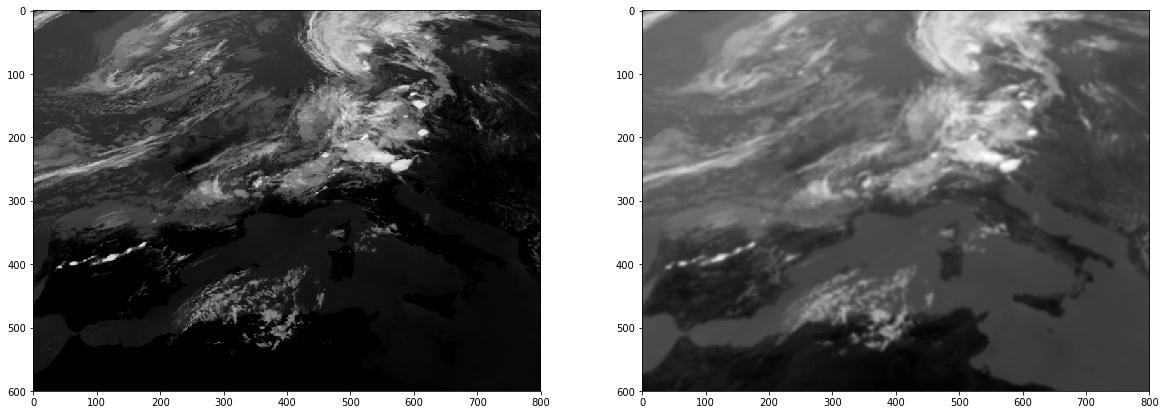

In [28]:
fig,ax = plt.subplots(1,2,figsize=(20,10))
ax[0].imshow(s.bt["IR_108"],vmin=210,vmax=300,cmap='gray_r')
ax[1].imshow(kernel2, cmap='gray_r')
                      

## Bilateraler Filter

In [29]:
import cv2

In [108]:
blur = cv2.bilateralFilter(s.bt['IR_108'].astype("float32"),15,10,15)
blur_hrv = cv2.bilateralFilter(np.clip(s.ref['HRV'],0,1).astype("float32"),20,15,15)

Text(0.5,1,'HRV mit bilateralem Filter')

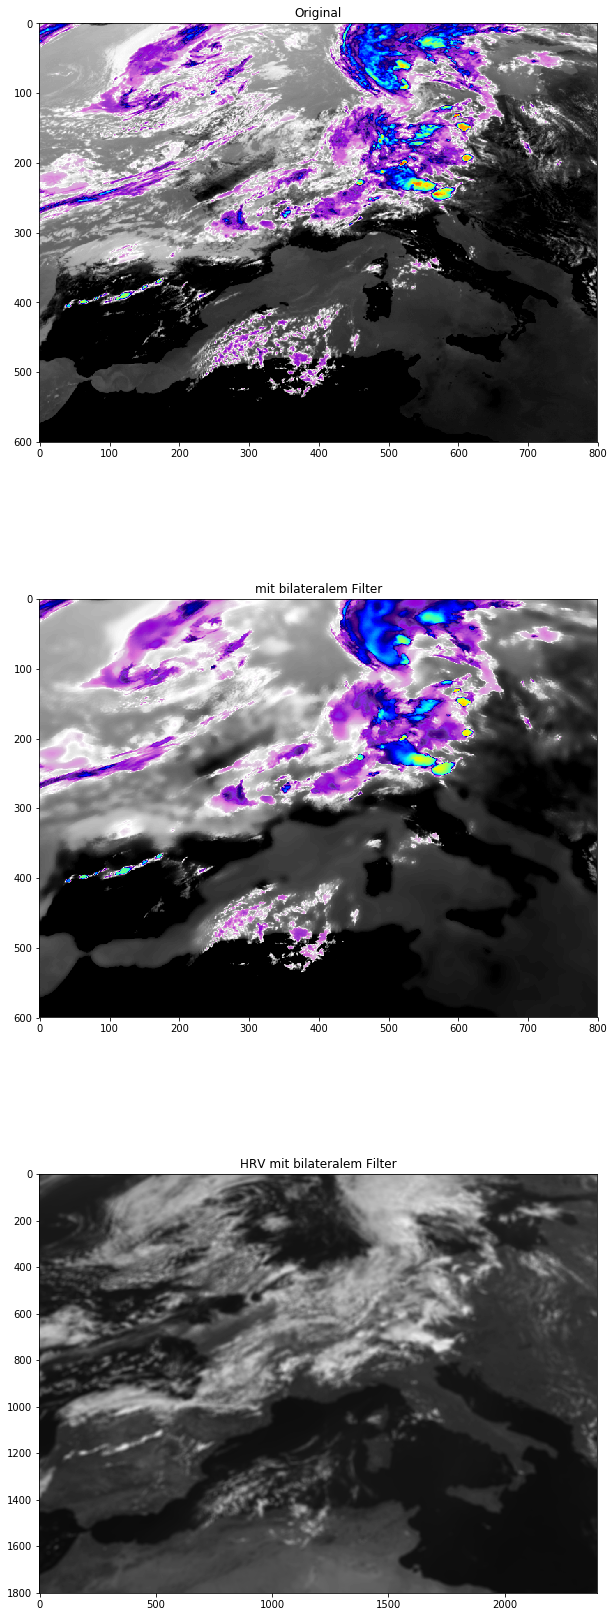

In [109]:
fig,ax = plt.subplots(3,1,figsize=(10,30))
ax[0].imshow(s.bt["IR_108"],vmin=210,vmax=300,cmap=emap)
ax[0].set_title("Original")
ax[1].imshow(blur, cmap=emap,vmin=210,vmax=300)
ax[1].set_title("mit bilateralem Filter")
ax[2].imshow(blur_hrv, cmap='gray',vmin=0,vmax=1)
ax[2].set_title("HRV mit bilateralem Filter")

(array([  1824.,   9020.,  12735.,  20397.,  34279.,  72821.,  83020.,
        159883.,  43824.,  42197.]),
 array([218.42143, 228.71829, 239.01515, 249.31201, 259.6089 , 269.90573,
        280.2026 , 290.49945, 300.79633, 311.09317, 321.39005],
       dtype=float32),
 <a list of 10 Patch objects>)

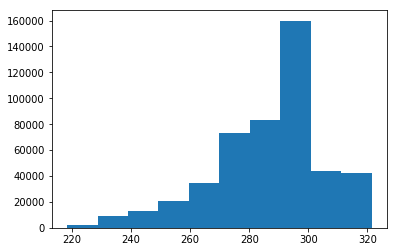

In [76]:
plt.hist(blur.ravel())

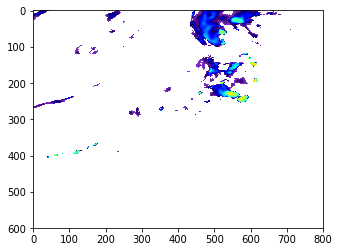

In [80]:
plt.imshow(np.ma.masked_greater(blur,np.percentile(blur,5)),cmap=emap,vmin=210,vmax=300)

## Histogram over Gradient (HOG)

In [81]:
from skimage.feature import hog

In [110]:
fd, hog_image = hog(blur_hrv, orientations=8, pixels_per_cell=(4, 4),cells_per_block=(1, 1), multichannel=False,visualise=True)

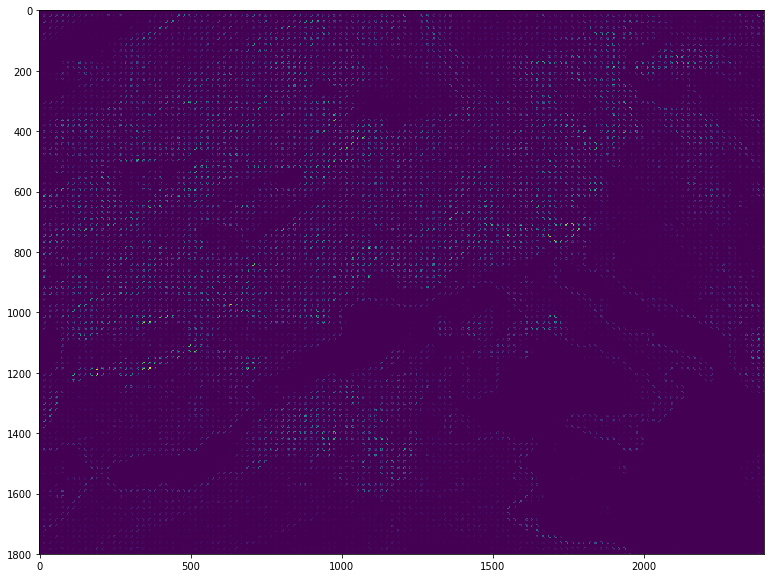

In [111]:
fig,ax = plt.subplots(1,1,figsize=(14,10))
ax.imshow(hog_image)